To execute e cell with code, select it & press Shift+Enter

# Stitch MD ImageXpress data, using m2stitch

More info about m2stitch:  
[https://github.com/yfukai/m2stitch](https://github.com/yfukai/m2stitch)  
Mostly following algorithms by [MIST](https://pages.nist.gov/MIST)

## Define file-paths:

Your files should be saved with the following structure:  
Make sure to call the different folders 'round*'  
('*' can be any characters)
```
base_dir
├───round1
│   ├───*A1*
│   │   └───*_Plate_*
│   │       └───TimePoint_1
│   │           ├───ZStep_1
│   │           ├───ZStep_2
|   │           .
|   │           .
│   ├───*A2*
│   │   └───*_Plate_*
│   │       └───TimePoint_1
│   │           ├───ZStep_1
│   │           ├───ZStep_2
|   │           .
|   │           .
|   │   .
|   │   .
├───round2
│   ├───*A1*
|   .
|   .
```

In the cell below, change the following file-paths:
* `flatfield_directory`: the directory where flatfield images for all channels are saved (set to None, if no flatfield correction should be done)
* `base_dir`: the directory where all rounds are in
* `save_dir`: the directory where stitched images will be saved

In [1]:
flatfield_directory = 'Z:\\zmbstaff\\9740\\Raw_Data\\shading_corrections_BaSiC'
base_dir = 'Z:\\zmbstaff\\9800\\Raw_Data\\MD4iRVP3'
save_dir = 'Z:\\zmbstaff\\9800\\Raw_Data\\MD4iRVP3\\stitched'

## Import modules:

In [2]:
import os
import glob
from zmb_hcs.stitching import check_tile_configuration, stitch_and_export_MD

## Process all rounds/wells at once:

In [ ]:
dirs_import = glob.glob(base_dir+'\\round*\\*\\')
for dir_import in dirs_import:
    round_dir, well_dir = os.path.dirname(dir_import).split('\\')[-2:]
    export_dir = os.path.join(save_dir, round_dir, well_dir)
    os.makedirs(export_dir, exist_ok=True)
    stitch_and_export_MD(export_dir+'\\stitched', dir_import, tile_subset=None, flatfield_directory=flatfield_directory, channels_used_for_stitching=[0])

## Alternatively: Process rounds/wells individually:

### Round1, A4

Change the round and well to the one you want to have stitched:

In [3]:
round = 'round1'
well = 'A4'

In [4]:
# find the import directory:
dir_import = glob.glob(base_dir+'\\'+round+'\\*'+well+'*')[0]
dir_import

'Z:\\zmbstaff\\9800\\Raw_Data\\MD4iRVP3\\round1\\R1_4i_MD_P3_RV_A4_40x_20230706'

In [ ]:
# create the export directory:
round_dir, well_dir = os.path.dirname(dir).split('\\')[-2:]
export_dir = os.path.join(save_dir, round_dir, well_dir)
os.makedirs(export_dir, exist_ok=True)

Total number of files: 22400


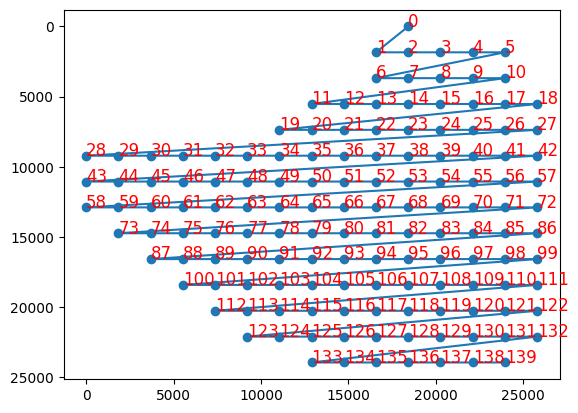

In [5]:
# view the tile-configuration:
check_tile_configuration(dir_import)

In [ ]:
# change this to the tile-subset you want stitched (set to None, if all should be stitched)
tile_subset = [28,29,30,43,44,45,58,59,60]

In [ ]:
# stitch and export one round/well:
stitch_and_export_MD(export_dir+'\\stitched', dir_import, tile_subset=tile_subset, flatfield_directory=flatfield_directory, channels_used_for_stitching=[0])